In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Create Dataset
n_samples= 2000
n_features= 10
n_classes= 2
random_state= 42

noise_class= 0.3
noise_moon= 0.3
noise_circle= 0.3

X,y= make_classification(n_samples= n_samples,
                   n_features= n_features,
                   n_classes=n_classes,
                   n_repeated= 0,
                   n_redundant= 0,
                   n_informative= n_features-1,
                   random_state= random_state,
                   n_clusters_per_class= 1,
                   flip_y= noise_class)

In [3]:
data_classification= (X,y)

moon= make_moons(n_samples= n_samples, noise= noise_moon, random_state= random_state)
circle= make_circles(n_samples= n_samples, noise= noise_circle,factor= 0.1, random_state= random_state)

datasets= [moon,circle]

### Classifiers

In [4]:
n_estimators= 10

svc= SVC()
knn= KNeighborsClassifier(n_neighbors=15)  # n_neighbors = k değeri
dt= DecisionTreeClassifier(random_state= random_state, max_depth= 2)

rf= RandomForestClassifier(n_estimators= n_estimators, random_state= random_state, max_depth= 2) # n_estimators ağaç sayısı belirlemek içindir.
ada= AdaBoostClassifier(base_estimator= dt, n_estimators= n_estimators, random_state= random_state)
v1= VotingClassifier(estimators= [('svc', svc),('knn',knn),('dt',dt),('rf',rf),('ada',ada)])

names= ["SVC","KNN","Decision Tree", "RandomForest", "AdaBoost", "Voting"]
classifiers= [svc, knn, dt, rf, ada, v1]

### Train

Dataset # 0
SVC: test set score: 0.91375
SVC: train set score: 0.915

KNN: test set score: 0.90375
KNN: train set score: 0.9291666666666667

Decision Tree: test set score: 0.8875
Decision Tree: train set score: 0.9

RandomForest: test set score: 0.8875
RandomForest: train set score: 0.895

AdaBoost: test set score: 0.8825
AdaBoost: train set score: 0.9283333333333333

Voting: test set score: 0.91
Voting: train set score: 0.92

--------------------------------------------------
Dataset # 1
SVC: test set score: 0.89
SVC: train set score: 0.9116666666666666

KNN: test set score: 0.88375
KNN: train set score: 0.9058333333333334

Decision Tree: test set score: 0.73125
Decision Tree: train set score: 0.7675

RandomForest: test set score: 0.87875
RandomForest: train set score: 0.91

AdaBoost: test set score: 0.88125
AdaBoost: train set score: 0.9133333333333333

Voting: test set score: 0.895
Voting: train set score: 0.9125

--------------------------------------------------
Dataset # 2
SVC: t

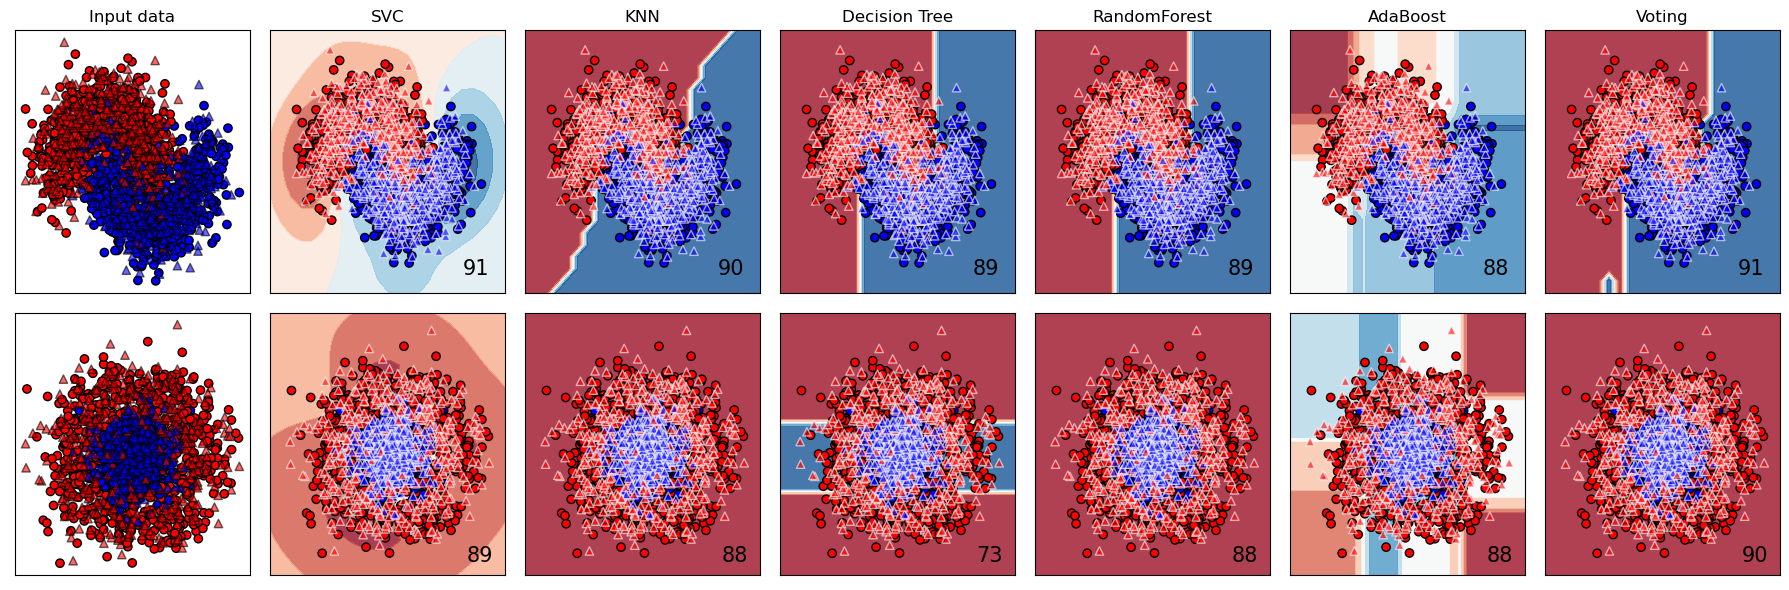

In [5]:
h= 0.2
i= 1

figure= plt.figure(figsize=(18,6))
for ds_cnt, ds in enumerate(datasets):
    X,y = ds
    X= RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state= random_state)
    
    x_min, x_max = X[:,0].min() - .5, X[:,0].max()+ .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max()+ .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax= plt.subplot(len(datasets), len(classifiers)+1, i) # i index
    
    if ds_cnt == 0: 
        ax.set_title("Input data")  # counter 0 ise input modele verilmiştir.
    
    # train-test plot
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap= cm_bright, edgecolors='k')
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap= cm_bright, alpha= 0.6, marker= '^', edgecolors='k')
    
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    print("Dataset # {}". format(ds_cnt))
    
    for name, clf in zip(names, classifiers):
        ax= plt.subplot(len(datasets), len(classifiers)+1, i)
        clf.fit(X_train, y_train)
        score= clf.score(X_test, y_test)
        print("{}: test set score: {}".format(name, score))
        score_train = clf.score(X_train, y_train)
        print("{}: train set score: {}".format(name, score_train))
        print()
        
        if hasattr(clf, "decision_function"):
            Z= clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z= clf.predict(np.c_[xx.ravel(), yy.ravel()])
            
        # Put the result into a color plot    
        Z= Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap= cm, alpha=.8)
        
        # Plot the training points
        ax.scatter(X_train[:,0], X_train[:,1], c= y_train, cmap= cm_bright,
                  edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm_bright, marker='^',
                  edgecolors= 'white', alpha=0.6)
        
        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_cnt == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ('%1.f'%score),
               size=15, horizontalalignment='right')
        i +=1
        
    print('--------------------------------------------------')
    

def make_classify(dc, clf, name):
    x, y = dc
    x = RobustScaler().fit_transform(x)  # standardization
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state= random_state)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score= clf.score(X_test, y_test)
        print("{}: test set score: {}".format(name, score))
        score_train= clf.score(X_train, y_train)
        print("{}: train set score: {}".format(name, score_train))
        print()

print("Dataset # 2")
make_classify(data_classification, classifiers, names)    
    

plt.tight_layout()
plt.show()
